In [1]:
from heart_display import load_images
from heart_variables import output_path
from heart_dataset import HeartDataset
from tqdm import tqdm
import heart_model as HM
import numpy as np
import torch
import matplotlib.pyplot as plt

C:\Users\chahb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:
images, names = load_images(output_path)
heart_dataset = HeartDataset(images)

In [42]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vae_model = HM.VAE(latent_dim=32).to(device)
vae_model.load_state_dict(torch.load('C:/Users/boite/Desktop/2A/IMA/IMA206/TP_IMA206_Project/models/vae_model_99.pth'))

<All keys matched successfully>

In [43]:
codes = []

with torch.no_grad():
    for idx in range(len(heart_dataset)):
        oh_image = heart_dataset[idx].unsqueeze(0)
        oh_image = oh_image.to(device)
        code = vae_model.encoder(oh_image)[0].squeeze(0) # Discard logvar
        codes.append(code)

In [62]:
list_of_numpy_arrays = [tensor.cpu().numpy() for tensor in codes]

# Stack tensors to form a 2D tensor
stacked_tensors = torch.stack(codes)

# Calculate the mean vector
mean_vector = torch.mean(stacked_tensors, dim=0)

# Calculate the variance vector
variance_vector = torch.var(stacked_tensors, dim=0)

In [89]:
# Draw new vectors following a normal distribution
num_samples = 10  # Number of new vectors to sample
new_vectors = torch.normal(mean_vector.expand(num_samples, -1), torch.sqrt(variance_vector.expand(num_samples, -1))).to('cuda')

# print("Mean Vector (NumPy):", mean_vector)
# print("Variance Vector (NumPy):", variance_vector)
# print("New Vectors (NumPy):", new_vectors[0])

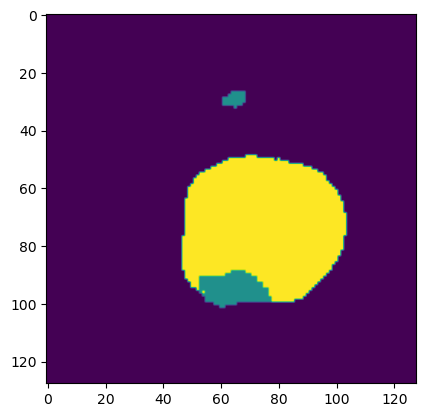

In [103]:
new_vector = new_vectors[4]
decoded_vector = vae_model.decoder(new_vector)
decoded_vector = decoded_vector.reshape((4,128,128))

generated_image = torch.argmax(decoded_vector.permute(1,2,0), dim=2)
plt.imshow(generated_image.cpu().numpy())